In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#cd '/Users/nikhilsingh/Downloads/Dalmia_machine_learning/Nikhil' 

/Users/nikhilsingh/Downloads/Dalmia_machine_learning/Nikhil


In [3]:
from utility.db_data import connection_db
from utility.datetime_util import create_date_columns

### Data Preparation (Dealer Muscle)

In [4]:
host="database-dalmia.cms6cet2hwec.ap-south-1.rds.amazonaws.com"
database="dalmia_digital"
user="postgres"
password="dalmia123"
sql_query =  "SELECT * FROM dalmia_sales.sales_data where billing_date >='2021-04-01' and sold_to_party_code between 7000000 and 7099999"
#reading the data
df = connection_db(host= host , database=database, user=user , password=password, sql_query=sql_query)
# df = pd.read_excel('data/sales_data_pivot - UPDATED WORKING.xlsx')

In [5]:
df.head()

,month,billing_date,sales_region,sales_zone,sales_type,manufacturing_plant,manufacturing_plant_name,plant,plant_name,sold_to_party_code,...,direct_depot,incoterms_inco,mode_of_transport,t_zone,tzone_desc,brand,product,bill_quantity,gross_bill_price,zbill_invoice_bill
0,Jul'23,2023-07-26,North East,NE1,Trade,3300,DCNEL FACTORY – LANKA,3300,DCNEL FACTORY – LANKA,7007301,...,Direct,FPD,Road,7833840320,ABHAYAPURI,DSP,DSP,25.0,253000,253000.0
1,Jul'23,2023-07-31,North East,NE1,Trade,3300,DCNEL FACTORY – LANKA,3300,DCNEL FACTORY – LANKA,7007301,...,Direct,FPD,Road,7833840320,ABHAYAPURI,DSP,DSP,15.0,151800,151800.0
2,Jul'23,2023-07-31,North East,NE1,Trade,3300,DCNEL FACTORY – LANKA,3300,DCNEL FACTORY – LANKA,7007301,...,Direct,FPD,Road,7833840320,ABHAYAPURI,DALMIA,PPC,10.0,95200,95200.0
3,Jul'23,2023-07-10,North East,NE1,Trade,6300,ALSTHOM FACTORY-JAGI ROAD,6300,ALSTHOM FACTORY-JAGI ROAD,7007301,...,Direct,FPD,Road,7833840320,ABHAYAPURI,DALMIA,PPC,4.0,38080,38080.0
4,Jul'23,2023-07-12,North East,NE1,Trade,6300,ALSTHOM FACTORY-JAGI ROAD,6300,ALSTHOM FACTORY-JAGI ROAD,7007301,...,Direct,FPD,Road,7833840320,ABHAYAPURI,DSP,DSP,15.0,151800,151800.0


In [6]:
df.columns

Index(['month', 'billing_date', 'sales_region', 'sales_zone', 'sales_type',
       'manufacturing_plant', 'manufacturing_plant_name', 'plant',
       'plant_name', 'sold_to_party_code', 'sold_to_party_name',
       'sold_to_party_district_name', 'ship_to_party_code',
       'ship_to_party_name', 'ship_to_party_district', 'invoice_no',
       'direct_depot', 'incoterms_inco', 'mode_of_transport', 't_zone',
       'tzone_desc', 'brand', 'product', 'bill_quantity', 'gross_bill_price',
       'zbill_invoice_bill'],
      dtype='object')

In [7]:
def return_yoy_df(df):
    df_sales = create_date_columns([df])
    df_sales = df_sales[['sold_to_party_code','Month_Year','bill_quantity']]
    #df_sales =df_sales[df_sales['sold_to_party_code']!='DONATION']
    df_group_month = df_sales.groupby(['sold_to_party_code','Month_Year']).agg({'bill_quantity': ['sum']}).reset_index()
    df_group_month.columns = ['Sold To Party Code', 'Month Year' , 'Sum']
    pivot_table = pd.pivot_table(df_group_month, values='Sum',columns='Month Year', index = 'Sold To Party Code')
    return pivot_table
pivot = return_yoy_df(df)

In [8]:
pivot.head()


Month Year,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,...,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,255.5,85.0,207.0,102.0,73.5,74.5,43.0,25.0,76.0,53.0,...,20.0,20.0,122.5,75.0,90.0,155.0,46.0,111.0,96.0,80.0
7000010,57.0,37.0,NaN,24.0,30.0,NaN,41.0,24.0,25.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,12.0,24.0
7000015,4.0,50.0,63.0,62.0,91.0,68.5,70.5,77.0,50.0,44.5,...,74.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000019,12.0,50.0,133.0,104.0,165.0,123.5,NaN,7.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,5.0,21.0,24.0,NaN,29.0,NaN,27.0,12.0,12.0


In [314]:
def return_yoy_df(df):
    df_sales = create_date_columns([df])
    df_sales = df_sales[['sold_to_party_code','Month_Year','bill_quantity']]
    #df_sales =df_sales[df_sales['sold_to_party_code']!='DONATION']
    df_group_month = df_sales.groupby(['sold_to_party_code','Month_Year']).agg({'bill_quantity': ['sum']}).reset_index()
    df_group_month.columns = ['Sold To Party Code', 'Month Year' , 'Sum']
    pivot_table = pd.pivot_table(df_group_month, values='Sum',columns='Month Year', index = 'Sold To Party Code')
    return pivot_table
pivot = return_yoy_df(df)

In [9]:
distt = df[['sold_to_party_code' , 'sales_region']].groupby(['sold_to_party_code' ,
                                                     'sales_region']).agg({'sales_region': ['count']}).reset_index()

In [10]:
distt.columns = ['dealer_id' , 'region' , 'count']
distt = distt[['dealer_id' , 'region']]
distt.index = distt['dealer_id']
distt.drop('dealer_id' , axis = 1 , inplace = True)

In [29]:
pivot = pivot.merge(distt , left_index=True , right_index=True , how = 'inner')
pivot

,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,...,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,region
7000004,255.5,85.0,207.0,102.0,73.5,74.5,43.0,25.0,76.0,53.0,...,20.0,122.5,75.0,90.0,155.0,46.0,111.0,96.0,80.0,East
7000010,57.0,37.0,0.0,24.0,30.0,0.0,41.0,24.0,25.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24.0,12.0,24.0,East
7000015,4.0,50.0,63.0,62.0,91.0,68.5,70.5,77.0,50.0,44.5,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,East
7000019,12.0,50.0,133.0,104.0,165.0,123.5,0.0,7.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,East
7000022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,21.0,24.0,0.0,29.0,0.0,27.0,12.0,12.0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,South
7041477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,South
7041478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,Central
7041494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,South


In [315]:
pivot.to_excel('data/sales_pivot.xlsx')

In [30]:
pivot = pivot.fillna(0)

In [32]:
influencer = pd.read_excel('data/Influencer Mapping.xlsx')

In [33]:
influencer_group = influencer[['Tagged Dealer SAP Code',
                               'Membership Id']].groupby(by= 'Tagged Dealer SAP Code').agg({'Membership Id':['count']}).reset_index()

In [34]:
host="database-dalmia.cms6cet2hwec.ap-south-1.rds.amazonaws.com"
database="dalmia_digital"
user="postgres"
password="dalmia123"
sql_query =  "select * from dalmia_sales.dealer_target"
#reading the data
target = connection_db(host= host , database=database, user=user , password=password, sql_query=sql_query)

In [35]:
target = target[target['dealer_id']!='Grand Total']

In [36]:
target['dealer_id'] = target['dealer_id'].astype('int')

In [37]:
target = target[['dealer_id','total_2022_04','total_2022_05','total_2022_06','total_2022_07','total_2022_08',
                'total_2022_09','total_2022_10','total_2022_11','total_2022_12','total_2023_01','total_2023_02','total_2023_03',
                'total_2023_04','total_2023_05']]

In [38]:
target = target[(target['dealer_id']>=7000000)&(target['dealer_id']<7100000)]

In [39]:
target.index = target['dealer_id']
target.drop('dealer_id' , axis = 1 , inplace = True)

In [40]:
influencer_group.columns = ['dealer_id' , 'influencer_count']

In [41]:
#influencer_group.columns = [ 'influencer_count']
influencer_group.index = influencer_group['dealer_id']
influencer_group.drop('dealer_id', axis = 1 , inplace =True)

In [42]:
data = target.merge(influencer_group , left_index=True , right_index=True , how = 'left')

In [43]:
data

,total_2022_04,total_2022_05,total_2022_06,total_2022_07,total_2022_08,total_2022_09,total_2022_10,total_2022_11,total_2022_12,total_2023_01,total_2023_02,total_2023_03,total_2023_04,total_2023_05,influencer_count
dealer_id,,,,,,,,,,,,,,,
7000004,130.0,110.0,135.0,105.0,65.0,59,28.0,40,56,28.0,55,150,99,110,8.0
7000010,50.0,40.0,50.0,30.0,11.0,18,0.0,0,0,0.0,0,0,0,0,2.0
7000015,100.0,75.0,80.0,128.0,51.0,70,59.0,52,75,65.0,0,0,0,0,7.0
7000022,0.0,31.0,31.0,31.0,2.0,6,8.0,19,28,35.0,30,30,18,30,1.0
7000025,110.0,80.0,90.0,80.0,81.0,142,124.0,126,94,110.0,110,170,113,128,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040102,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,1137,NaN
7040104,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,200,120,NaN
7040106,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0,5,0,NaN


In [44]:
def count_zeros_before_first_nonzero(row):
    count = 0
    for value in row:
        if value == 0:
            count += 1
        else:
            break 
    return count
data['month_new_dealer'] = data.apply(count_zeros_before_first_nonzero , axis = 1)

In [83]:
#yoy_pivot_table dealer wise
def return_yoy_df(df):
    df_sales = create_date_columns([df])
    df_sales = df_sales[['sold_to_party_code','Month_Year','bill_quantity']]
    #df_sales =df_sales[df_sales['sold_to_party_code']!='DONATION']
    df_group_month = df_sales.groupby(['sold_to_party_code','Month_Year']).agg({'bill_quantity': ['sum']}).reset_index()
    df_group_month.columns = ['Sold To Party Code', 'Month Year' , 'Sum']
    pivot_table = pd.pivot_table(df_group_month, values='Sum',columns='Month Year', index = 'Sold To Party Code')
    return pivot_table
pivot = return_yoy_df(df)

In [84]:
pivot = pivot.fillna(0)

In [85]:
pivot.columns

Index(['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
       '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',
       '2023-04', '2023-05', '2023-06', '2023-07'],
      dtype='object', name='Month Year')

In [86]:
data_1 = data.merge(pivot , left_index=True , right_index=True , how = 'right')

In [87]:
#geographical_reach
geographical = df[['sold_to_party_code', 'ship_to_party_district']]
geographical_group = geographical.groupby('sold_to_party_code')['ship_to_party_district'].nunique().reset_index()

In [88]:
geographical_group.index = geographical_group['sold_to_party_code']
geographical_group.drop('sold_to_party_code' , axis =1 , inplace = True)

In [89]:
data_1 = data_1.merge(geographical_group , left_index=True , right_index=True , how = 'inner')

In [90]:
#transpotation
transportation = df[['sold_to_party_code','incoterms_inco']]
transportation['transportation_flag'] = (transportation['incoterms_inco'] == 'FSB').astype(int)

In [91]:
filtered_df = transportation[transportation['transportation_flag'] == 1]

In [92]:
filtered_df = filtered_df.drop_duplicates(subset=['sold_to_party_code'])

In [93]:
filtered_df

,sold_to_party_code,incoterms_inco,transportation_flag
29563,7001118,FSB,1
98537,7016140,FSB,1
98547,7016164,FSB,1
99718,7016296,FSB,1
100304,7016446,FSB,1
...,...,...,...
3596882,7031819,FSB,1
3647505,7030639,FSB,1
3684172,7014314,FSB,1
3698784,7035342,FSB,1


In [94]:
test = data_1[data_1['month_new_dealer']<=6]
test

,total_2022_04,total_2022_05,total_2022_06,total_2022_07,total_2022_08,total_2022_09,total_2022_10,total_2022_11,total_2022_12,total_2023_01,...,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,ship_to_party_district
Sold To Party Code,,,,,,,,,,,,,,,,,,,,,
7000004,130.0,110.0,135.0,105.0,65.0,59.0,28.0,40.0,56.0,28.0,...,20.0,122.5,75.00,90.0,155.0,46.0,111.0,96.0,80.0,1
7000010,50.0,40.0,50.0,30.0,11.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,24.0,12.0,24.0,1
7000015,100.0,75.0,80.0,128.0,51.0,70.0,59.0,52.0,75.0,65.0,...,27.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1
7000022,0.0,31.0,31.0,31.0,2.0,6.0,8.0,19.0,28.0,35.0,...,5.0,21.0,24.00,0.0,29.0,0.0,27.0,12.0,12.0,1
7000025,110.0,80.0,90.0,80.0,81.0,142.0,124.0,126.0,94.0,110.0,...,108.8,73.0,167.00,137.0,173.0,158.0,132.0,109.0,147.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037404,0.0,0.0,0.0,0.0,0.0,0.0,80.0,160.0,160.0,292.0,...,65.0,97.5,122.75,157.0,136.0,135.0,172.5,163.5,108.0,1
7037405,0.0,0.0,0.0,0.0,0.0,0.0,60.0,80.0,80.0,224.0,...,56.0,17.0,36.00,120.5,121.5,72.0,56.0,36.0,0.0,1
7037411,0.0,0.0,0.0,0.0,0.0,0.0,60.0,80.0,80.0,160.0,...,36.5,0.0,24.50,27.5,28.0,18.0,0.0,17.0,13.0,1


In [95]:
test.columns

Index(['total_2022_04', 'total_2022_05', 'total_2022_06', 'total_2022_07',
       'total_2022_08', 'total_2022_09', 'total_2022_10', 'total_2022_11',
       'total_2022_12', 'total_2023_01', 'total_2023_02', 'total_2023_03',
       'total_2023_04', 'total_2023_05', 'influencer_count',
       'month_new_dealer', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07',
       'ship_to_party_district'],
      dtype='object')

In [96]:
total = ['total_2022_04', 'total_2022_05', 'total_2022_06', 'total_2022_07',
       'total_2022_08', 'total_2022_09', 'total_2022_10', 'total_2022_11',
       'total_2022_12', 'total_2023_01', 'total_2023_02', 'total_2023_03']
test['total_target'] = 0
for i in total:
    test['total_target'] = test[i]+test['total_target']

In [97]:
sales = ['2022-04', '2022-05', '2022-06', '2022-07',
       '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01',
       '2023-02', '2023-03']
test['total_sales'] = 0
for i in sales:
    test['total_sales'] = test[i]+test['total_sales']

In [98]:
test['target_achieved'] =test['total_sales']/test['total_target']

In [114]:
cluster_df = test[['total_sales'  , 'influencer_count' , 'target_achieved' ]].copy()

In [115]:
cluster_df = cluster_df.fillna(0)

In [251]:
#cluster_df['region'] = cluster_df['region'].replace({'East':0,'NE':1,'North East':1 , 'South':2})

In [116]:
cluster_df

,total_sales,influencer_count,target_achieved
Sold To Party Code,,,
7000004,784.50,8.0,0.816337
7000010,87.80,2.0,0.441206
7000015,445.00,7.0,0.589404
7000022,155.50,1.0,0.619522
7000025,1372.80,11.0,1.042369
...,...,...,...
7037404,608.25,1.0,0.367301
7037405,351.00,7.0,0.364108
7037411,116.50,2.0,0.177591


In [120]:
sales = ['2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03']
cluster_df['previous_sales'] = test[sales].sum(axis = 1)

In [121]:
cluster_df['growth'] = cluster_df['total_sales']-cluster_df['previous_sales']
cluster_df = cluster_df[['total_sales','influencer_count','target_achieved','growth']]

In [122]:
cluster_df

,total_sales,influencer_count,target_achieved,growth
Sold To Party Code,,,,
7000004,784.50,8.0,0.816337,-313.00
7000010,87.80,2.0,0.441206,-199.20
7000015,445.00,7.0,0.589404,-221.00
7000022,155.50,1.0,0.619522,155.50
7000025,1372.80,11.0,1.042369,201.80
...,...,...,...,...
7037404,608.25,1.0,0.367301,608.25
7037405,351.00,7.0,0.364108,351.00
7037411,116.50,2.0,0.177591,116.50


In [253]:
cluster_df_east = cluster_df[cluster_df['region']=='East'][['total_sales','influencer_count','target_achieved']]

In [254]:
cluster_df_ne = cluster_df[(cluster_df['region']=='NE')|(cluster_df['region']=='North East')][['total_sales','influencer_count','target_achieved']]

In [255]:
cluster_df_south = cluster_df[cluster_df['region']=='South'][['total_sales','influencer_count','target_achieved']]

### Dealer Muscle 

In [110]:
from sklearn.preprocessing import MinMaxScaler
def factor_analysis(df):
    Sc = MinMaxScaler()
    scaled_df = Sc.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df , columns = df.columns)
    covariance_matrix = np.cov(scaled_df.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    return explained_variance_ratio , scaled_df

In [111]:
def deciles(number): 
    if number==0:
        return 0
    if number>0 and number<0.1:
        return 1
    if number>=0.1 and number<0.2:
        return 2
    if number>=0.2 and number<0.3:
        return 3
    if number>=0.3 and number<0.4:
        return 4
    if number>=0.4 and number<0.5:
        return 5
    if number>=0.5 and number<0.6:
        return 6
    if number>=0.6 and number<0.7:
        return 7
    if number>=0.7 and number<0.8:
        return 8
    if number>=0.8 and number<0.9:
        return 9
    if number>=0.9 and number<=1:
        return 10

In [143]:
explained_variance,muscle_df = factor_analysis(cluster_df)
muscle_df['total_sales'] = muscle_df['total_sales'].apply(deciles)
muscle_df['influencer_count'] = muscle_df['influencer_count'].apply(deciles)
muscle_df['target_achieved'] = muscle_df['target_achieved'].apply(deciles)
muscle_df['growth'] = muscle_df['growth'].apply(deciles)

0

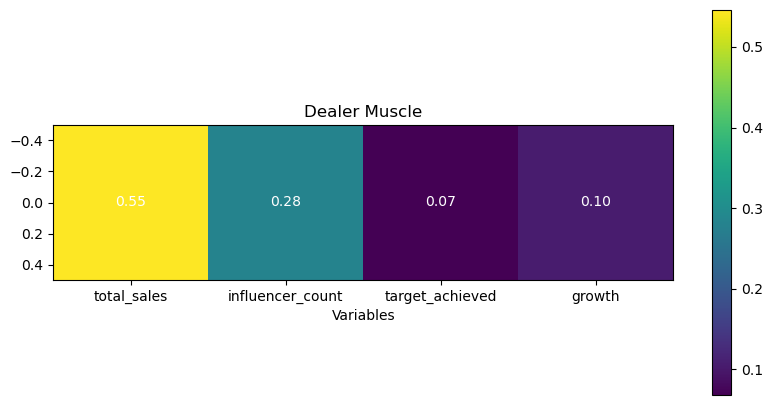

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Given array and row names
data = explained_variance
row_names = ['total_sales', 'influencer_count', 'target_achieved','growth']

# Create a figure and axis
fig, ax = plt.subplots(figsize = (10,5))

# Plot the heatmap as a row with numbers displayed
heatmap = ax.imshow(data.reshape(1, -1))

# Customize the plot
ax.set_title('Dealer Muscle')
ax.set_xlabel('Variables')
#ax.set_ylabel('Rows')
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(np.arange(1, len(data) + 1))  # Column numbering starts from 1

# Set the number of locator locations to match the number of row names
ax.set_xticks(np.arange(len(row_names)))
ax.set_xticklabels(row_names)

ax.grid(False)

# Add numbers inside the heatmap cells
for i in range(len(data)):
    ax.text(i, 0, f'{data[i]:.2f}', va='center', ha='center', color='white')

# Add colorbar
cbar = fig.colorbar(heatmap)

# Show the plot
plt.show()


In [147]:
muscle_df['rating'] = muscle_df['total_sales']*explained_variance[0]+muscle_df['influencer_count']*explained_variance[1]+muscle_df['target_achieved']*explained_variance[2]+muscle_df['growth']*explained_variance[3]


In [149]:
muscle_df.index = cluster_df.index

In [154]:
muscle_df

,total_sales,influencer_count,target_achieved,growth,rating
Sold To Party Code,,,,,
7000004,1,1,2,5,1.483843
7000010,1,1,1,5,1.415605
7000015,1,1,1,5,1.415605
7000022,1,1,1,5,1.415605
7000025,1,1,2,5,1.483843
...,...,...,...,...,...
7037404,1,1,1,5,1.415605
7037405,1,1,1,5,1.415605
7037411,1,1,1,5,1.415605


In [258]:
explained_variance_east,muscle_df_east = factor_analysis(cluster_df[cluster_df['region']=='East'][['total_sales',
                                                                                                   'influencer_count','target_achieved']])
explained_variance_ne,muscle_df_ne = factor_analysis(cluster_df[(cluster_df['region']=='NE')|(cluster_df['region']=='North East')][['total_sales',
                                                                                                   'influencer_count','target_achieved']])
explained_variance_south,muscle_df_south = factor_analysis(cluster_df[cluster_df['region']=='South'][['total_sales',
                                                                                                   'influencer_count','target_achieved']])

In [259]:
muscle_df_east['total_sales'] = muscle_df_east['total_sales'].apply(deciles)
muscle_df_east['influencer_count'] = muscle_df_east['influencer_count'].apply(deciles)
muscle_df_east['target_achieved'] = muscle_df_east['target_achieved'].apply(deciles)
muscle_df_ne['total_sales'] = muscle_df_ne['total_sales'].apply(deciles)
muscle_df_ne['influencer_count'] = muscle_df_ne['influencer_count'].apply(deciles)
muscle_df_ne['target_achieved'] = muscle_df_ne['target_achieved'].apply(deciles)
muscle_df_south['total_sales'] = muscle_df_south['total_sales'].apply(deciles)
muscle_df_south['influencer_count'] = muscle_df_south['influencer_count'].apply(deciles)
muscle_df_south['target_achieved'] = muscle_df_south['target_achieved'].apply(deciles)

In [86]:
explained_variance_east

array([0.61762926, 0.23014496, 0.15222578])

In [260]:

muscle_df_east['rating_muscle'] = muscle_df_east['total_sales']*explained_variance_east[0]+muscle_df_east['influencer_count']*explained_variance_east[1]+muscle_df_east['target_achieved']*explained_variance_east[2]
muscle_df_ne['rating_muscle'] = muscle_df_ne['total_sales']*explained_variance_ne[0]+muscle_df_ne['influencer_count']*explained_variance_ne[1]+muscle_df_ne['target_achieved']*explained_variance_ne[2]
muscle_df_south['rating_muscle'] = muscle_df_south['total_sales']*explained_variance_south[0]+muscle_df_south['influencer_count']*explained_variance_south[1]+muscle_df_south['target_achieved']*explained_variance_south[2]


In [277]:
muscle_df_east.index= cluster_df[cluster_df['region']=='East'].index
muscle_df_ne.index= cluster_df[(cluster_df['region']=='NE')|(cluster_df['region']=='North East')].index
muscle_df_south.index = cluster_df[cluster_df['region']=='South'].index

### Dealer Bargaining Power wrt Competition

In [52]:
test

,total_2022_04,total_2022_05,total_2022_06,total_2022_07,total_2022_08,total_2022_09,total_2022_10,total_2022_11,total_2022_12,total_2023_01,...,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,ship_to_party_district,total_target,total_sales,target_achieved
7000004,130.0,110.0,135.0,105.0,65.0,59,28.0,40,56,28.0,...,75.00,90.0,155.0,46.0,111.0,96.0,1,1170.0,941.50,0.804701
7000010,50.0,40.0,50.0,30.0,11.0,18,0.0,0,0,0.0,...,0.00,0.0,0.0,0.0,24.0,12.0,1,199.0,111.80,0.561809
7000015,100.0,75.0,80.0,128.0,51.0,70,59.0,52,75,65.0,...,0.00,0.0,0.0,0.0,0.0,0.0,1,755.0,445.00,0.589404
7000022,0.0,31.0,31.0,31.0,2.0,6,8.0,19,28,35.0,...,24.00,0.0,29.0,0.0,27.0,12.0,1,299.0,182.50,0.610368
7000025,110.0,80.0,90.0,80.0,81.0,142,124.0,126,94,110.0,...,167.00,137.0,173.0,158.0,132.0,109.0,1,1558.0,1662.80,1.067266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037404,0.0,0.0,0.0,0.0,0.0,0,80.0,160,160,292.0,...,122.75,157.0,136.0,135.0,172.5,163.5,1,2676.0,915.75,0.342209
7037405,0.0,0.0,0.0,0.0,0.0,0,60.0,80,80,224.0,...,36.00,120.5,121.5,72.0,56.0,36.0,1,1524.0,479.00,0.314304
7037411,0.0,0.0,0.0,0.0,0.0,0,60.0,80,80,160.0,...,24.50,27.5,28.0,18.0,0.0,17.0,1,856.0,134.50,0.157126
7037425,0.0,0.0,0.0,0.0,0.0,0,60.0,75,124,175.0,...,80.00,86.0,130.0,137.0,80.5,130.0,1,1698.0,685.50,0.403710


In [53]:
sow = pd.read_excel('data/DAP_Data_SOW.xlsx')
sow = sow[(sow['sap_id']>=7000000)&(sow['sap_id']<7100000)][['sap_id' , 'DCBL Pot Vol' , 'Total Potential', 'is_business_closed', 'sap_active']]
sow['sap_id'] = sow['sap_id'].astype(int)
sow = sow[sow['is_business_closed']=='no']
#sow = sow[sow['sap_active']=='Y']
sow.index = sow['sap_id']
sow.drop('sap_id' , axis = 1 , inplace = True)
sow = sow.dropna(axis=0)
sow['share_of_wallet']= (sow['DCBL Pot Vol']/sow['Total Potential'])*100
sow = sow[['share_of_wallet']]

In [54]:
test = test.merge(sow , left_index=True, right_index=True , how='left')

In [55]:
test = test.fillna(0)

In [56]:
east = pd.read_excel('data/Price Neutralization.xlsx' , sheet_name = 'East')
south = pd.read_excel('data/Price Neutralization.xlsx' , sheet_name = 'South')
ne = pd.read_excel('data/Price Neutralization.xlsx' , sheet_name = 'NE')

In [57]:
discount = pd.concat([east,south,ne], axis = 0)

In [58]:
discount.index = discount['Dealer Code']
discount.drop('Dealer Code' , axis =1 , inplace = True)

In [59]:
test = test.merge(discount, left_index=True, right_index=True , how='inner')
test

,total_2022_04,total_2022_05,total_2022_06,total_2022_07,total_2022_08,total_2022_09,total_2022_10,total_2022_11,total_2022_12,total_2023_01,...,2023-03,2023-04,2023-05,2023-06,ship_to_party_district,total_target,total_sales,target_achieved,share_of_wallet,Average Price Neutralization
7000004,130.0,110.0,135.0,105.0,65.0,59,28.0,40,56,28.0,...,155.0,46.0,111.0,96.0,1,1170.0,941.50,0.804701,48.800000,0.022600
7000010,50.0,40.0,50.0,30.0,11.0,18,0.0,0,0,0.0,...,0.0,0.0,24.0,12.0,1,199.0,111.80,0.561809,20.000000,0.041200
7000015,100.0,75.0,80.0,128.0,51.0,70,59.0,52,75,65.0,...,0.0,0.0,0.0,0.0,1,755.0,445.00,0.589404,14.893617,0.032700
7000022,0.0,31.0,31.0,31.0,2.0,6,8.0,19,28,35.0,...,29.0,0.0,27.0,12.0,1,299.0,182.50,0.610368,7.894737,0.021700
7000025,110.0,80.0,90.0,80.0,81.0,142,124.0,126,94,110.0,...,173.0,158.0,132.0,109.0,1,1558.0,1662.80,1.067266,31.250000,0.022900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037404,0.0,0.0,0.0,0.0,0.0,0,80.0,160,160,292.0,...,136.0,135.0,172.5,163.5,1,2676.0,915.75,0.342209,100.000000,0.012900
7037405,0.0,0.0,0.0,0.0,0.0,0,60.0,80,80,224.0,...,121.5,72.0,56.0,36.0,1,1524.0,479.00,0.314304,0.000000,0.006500
7037411,0.0,0.0,0.0,0.0,0.0,0,60.0,80,80,160.0,...,28.0,18.0,0.0,17.0,1,856.0,134.50,0.157126,0.000000,0.009600
7037425,0.0,0.0,0.0,0.0,0.0,0,60.0,75,124,175.0,...,130.0,137.0,80.5,130.0,1,1698.0,685.50,0.403710,100.000000,0.047748


In [60]:
test = test.fillna(0)

In [62]:
dealer_bargaining = test[['Average Price Neutralization' , 'share_of_wallet'  ]]
dealer_bargaining = dealer_bargaining.fillna(0)

In [64]:
explained_variance,bargain_df = factor_analysis(dealer_bargaining)

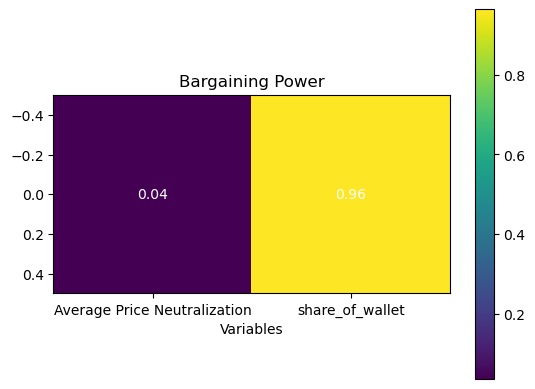

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Given array and row names
data = explained_variance
row_names = ['Average Price Neutralization' , 'share_of_wallet' ]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the heatmap as a row with numbers displayed
heatmap = ax.imshow(data.reshape(1, -1))

# Customize the plot
ax.set_title('Bargaining Power')
ax.set_xlabel('Variables')
#ax.set_ylabel('Rows')
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(np.arange(1, len(data) + 1))  # Column numbering starts from 1

# Set the number of locator locations to match the number of row names
ax.set_xticks(np.arange(len(row_names)))
ax.set_xticklabels(row_names)

ax.grid(False)

# Add numbers inside the heatmap cells
for i in range(len(data)):
    ax.text(i, 0, f'{data[i]:.2f}', va='center', ha='center', color='white')

# Add colorbar
cbar = fig.colorbar(heatmap)

# Show the plot
plt.show()

In [208]:
def dataframe(df):
    df_east = df[df['region']=='East']
    df_ne = df[df['region']=='NE']
    df_south = df[df['region']=='South']
    df_east.drop('region', axis = 1 , inplace = True)
    df_ne.drop('region', axis = 1 , inplace = True)
    df_south.drop('region', axis = 1 , inplace = True)
    return df_east , df_ne , df_south
def calculate_rating(df):
    for i in df.columns:
        df[i] = df[i].apply(deciles)
    return df


In [209]:
dealer_bargaining_east , dealer_bargaining_ne, dealer_bargaining_south = dataframe(dealer_bargaining)

In [235]:
explained_variance_east,bargain_df_east = factor_analysis(dealer_bargaining_east)
explained_variance_ne,bargain_df_ne = factor_analysis(dealer_bargaining_ne)
explained_variance_south,bargain_df_south = factor_analysis(dealer_bargaining_south)

In [237]:
bargain_df_east = calculate_rating(bargain_df_east)

In [239]:
bargain_df_ne= calculate_rating(bargain_df_ne)
bargain_df_south = calculate_rating(bargain_df_south)

In [240]:
bargain_df_east['rating'] = bargain_df_east['Average Price Neutralization']*explained_variance_east[0]+bargain_df_east['share_of_wallet']*explained_variance_east[1]
bargain_df_ne['rating'] = bargain_df_ne['Average Price Neutralization']*explained_variance_ne[0]+bargain_df_ne['share_of_wallet']*explained_variance_ne[1]
bargain_df_south['rating'] = bargain_df_south['Average Price Neutralization']*explained_variance_south[0]+bargain_df_south['share_of_wallet']*explained_variance_south[1]

In [270]:
bargain_df_east.index = dealer_bargaining_east.index
bargain_df_ne.index = dealer_bargaining_ne.index
bargain_df_south.index = dealer_bargaining_south.index

In [269]:
bargain_df_east

,Average Price Neutralization,share_of_wallet,rating
0,1,5,4.929475
1,2,3,2.982369
2,2,2,2.000000
3,1,1,1.000000
4,1,4,3.947106
...,...,...,...
4464,1,0,0.017631
4465,2,4,3.964737
4466,2,0,0.035263
4467,1,0,0.017631


### Dealer Relationship

In [70]:
import numpy as np 
import pandas as pd 
credit_util_east = pd.read_excel('data/Credit Limit Utilization.xlsx' , sheet_name = 'East')
credit_util_ne = pd.read_excel('data/Credit Limit Utilization.xlsx' , sheet_name = 'NE')
credit_util_south = pd.read_excel('data/Credit Limit Utilization.xlsx' , sheet_name = 'South')

In [71]:
total_discount_ne = pd.read_excel('data/Total Discount.xlsx' , sheet_name = 'NE')
total_discount_south = pd.read_excel('data/Total Discount.xlsx' , sheet_name = 'South')
total_discount_east = pd.read_excel('data/Total Discount.xlsx' , sheet_name = 'East')

In [72]:
discount_availed_ne = pd.read_excel('data/No. of Discounts Availed.xlsx' , sheet_name = 'NE') 
discount_availed_south = pd.read_excel('data/No. of Discounts Availed.xlsx' , sheet_name = 'South') 
discount_availed_east = pd.read_excel('data/No. of Discounts Availed.xlsx' , sheet_name = 'East') 

In [73]:
dealer_visited_ne = pd.read_excel('data/Total Dealer Visit.xlsx' , sheet_name = 'NE')
dealer_visited_east = pd.read_excel('data/Total Dealer Visit.xlsx' , sheet_name = 'East') 
dealer_visited_south = pd.read_excel('data/Total Dealer Visit.xlsx' , sheet_name = 'South') 



In [153]:
dealer_visited_east

,Dealer ID,April'22,May'22,June'22,July'22,August'22,September'22,October'22,November'22,December'22,January'23,February'23,March'23,Total Visit
0,7000110,17.0,24.0,24.0,21.0,20.0,17.0,11.0,15.0,17.0,13.0,12.0,17.0,208
1,7000541,15.0,24.0,27.0,18.0,25.0,23.0,16.0,12.0,16.0,11.0,9.0,6.0,202
2,7001282,31.0,28.0,30.0,32.0,14.0,11.0,9.0,9.0,7.0,7.0,NaN,7.0,185
3,7013731,21.0,24.0,22.0,20.0,22.0,20.0,7.0,9.0,12.0,6.0,5.0,13.0,181
4,7000380,17.0,15.0,14.0,13.0,18.0,14.0,11.0,17.0,16.0,15.0,15.0,15.0,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5920,7039238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5921,7039242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5922,7039244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
5923,7039265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1


In [169]:
dealer_visited_east

,Dealer ID,April'22,May'22,June'22,July'22,August'22,September'22,October'22,November'22,December'22,January'23,February'23,March'23,Total Visit
0,7000110,17.0,24.0,24.0,21.0,20.0,17.0,11.0,15.0,17.0,13.0,12.0,17.0,208
1,7000541,15.0,24.0,27.0,18.0,25.0,23.0,16.0,12.0,16.0,11.0,9.0,6.0,202
2,7001282,31.0,28.0,30.0,32.0,14.0,11.0,9.0,9.0,7.0,7.0,NaN,7.0,185
3,7013731,21.0,24.0,22.0,20.0,22.0,20.0,7.0,9.0,12.0,6.0,5.0,13.0,181
4,7000380,17.0,15.0,14.0,13.0,18.0,14.0,11.0,17.0,16.0,15.0,15.0,15.0,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5920,7039238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5921,7039242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
5922,7039244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1
5923,7039265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1


In [74]:
relationship_east = credit_util_east.merge(total_discount_east, 
                                           left_on='Dealer Code', right_on='Dealer ID', how='inner').merge(dealer_visited_east[['Dealer ID','Total Visit']],
                                            left_on = 'Dealer Code', right_on = 'Dealer ID',
                                            how = 'inner').merge(discount_availed_east[['Dealer Code', 'No. of discount availed']],
                                                                 left_on = 'Dealer Code', right_on = 'Dealer Code',
                                            how = 'inner')
relationship_ne = credit_util_ne.merge(total_discount_ne, 
                                           left_on='Dealer Code', right_on='Dealer ID', how='inner').merge(dealer_visited_ne[['Dealer ID','Total Visit']],
                                            left_on = 'Dealer Code', right_on = 'Dealer ID',
                                            how = 'inner').merge(discount_availed_ne,
                                                                 left_on = 'Dealer Code', right_on = 'Dealer Code',
                                            how = 'inner')
relationship_south = credit_util_south.merge(total_discount_south, 
                                           left_on='Dealer Code', right_on='Dealer ID', how='inner').merge(dealer_visited_south[['Dealer ID','Total Visit']],
                                            left_on = 'Dealer Code', right_on = 'Dealer ID',
                                            how = 'inner').merge(discount_availed_south,
                                                                 left_on = 'Dealer Code', right_on = 'Dealer Code',
                                            how = 'inner')

In [75]:
relationship_east.index = relationship_east['Dealer Code']
relationship_east.drop('Dealer Code', axis =1 , inplace = True)
relationship_ne.index = relationship_ne['Dealer Code']
relationship_ne.drop('Dealer Code', axis =1 , inplace = True)
relationship_south.index = relationship_south['Dealer Code']
relationship_south.drop('Dealer Code', axis =1 , inplace = True)

In [76]:
relationship_east = relationship_east[['Credit Limit Utilization',  'Total Discount',
        'Total Visit', 'No. of discount availed']]
relationship_ne = relationship_ne[['Credit Limit Utilization',  'Total Discount',
        'Total Visit', 'No. of Discount Taken']]
relationship_south = relationship_south[['Credit Limit Utilization',  'Total Discount',
        'Total Visit', 'No. of Disocunts Availed']]

In [77]:
relation_df = pd.concat([relationship_east,relationship_ne,relationship_south], axis = 0)

In [80]:
relation_df = relation_df.fillna(0)
relation_df['Discounts_availed'] = relation_df['No. of Discount Taken']+relation_df['No. of discount availed']+relation_df['No. of Disocunts Availed']
relation_df.drop(['No. of Discount Taken','No. of discount availed','No. of Disocunts Availed'], axis = 1 , inplace = True)


In [82]:
relation_df.columns

Index(['Credit Limit Utilization', 'Total Discount', 'Total Visit',
       'Discounts_availed'],
      dtype='object')

In [81]:
explained_variance,relation_df = factor_analysis(relation_df)

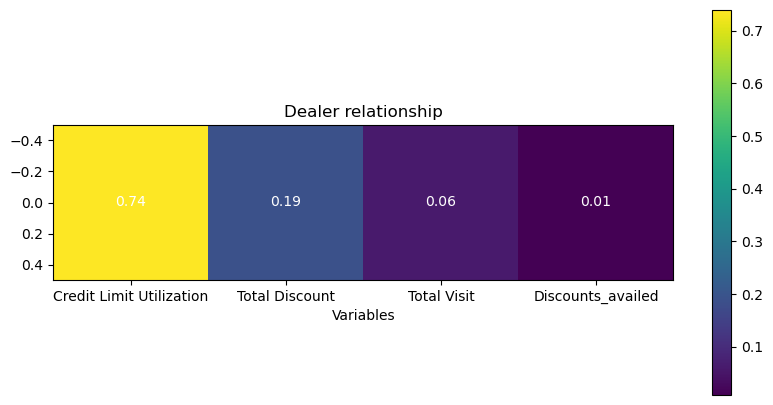

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Given array and row names
data = explained_variance
row_names = ['Credit Limit Utilization', 'Total Discount', 'Total Visit',
       'Discounts_availed' ]

# Create a figure and axis
fig, ax = plt.subplots(figsize = (10,5))

# Plot the heatmap as a row with numbers displayed
heatmap = ax.imshow(data.reshape(1, -1))

# Customize the plot
ax.set_title('Dealer relationship')
ax.set_xlabel('Variables')
#ax.set_ylabel('Rows')
ax.set_xticks(np.arange(len(data)))
ax.set_xticklabels(np.arange(1, len(data) + 1))  # Column numbering starts from 1

# Set the number of locator locations to match the number of row names
ax.set_xticks(np.arange(len(row_names)))
ax.set_xticklabels(row_names)

ax.grid(False)

# Add numbers inside the heatmap cells
for i in range(len(data)):
    ax.text(i, 0, f'{data[i]:.2f}', va='center', ha='center', color='white')

# Add colorbar
cbar = fig.colorbar(heatmap)

# Show the plot
plt.show()

In [188]:
explained_variance_east,relation_df_east = factor_analysis(relationship_east)
explained_variance_ne,relation_df_ne = factor_analysis(relationship_ne)
explained_variance_south,relation_df_south = factor_analysis(relationship_south)

In [192]:
relation_df_east.index = relationship_east.index
relation_df_south.index = relationship_south.index
relation_df_ne.index = relationship_ne.index

In [193]:
relation_df_east= calculate_rating(relation_df_east)
relation_df_ne= calculate_rating(relation_df_ne)
relation_df_south= calculate_rating(relation_df_south)

In [196]:
relation_df_east['rating']=relation_df_east['Credit Limit Utilization']*explained_variance_east[0]+relation_df_east['Total Discount']*explained_variance_east[1]+relation_df_east['Total Visit']*explained_variance_east[2]+relation_df_east['No. of discount availed']*explained_variance_east[3]
relation_df_ne['rating']=relation_df_ne['Credit Limit Utilization']*explained_variance_ne[0]+relation_df_ne['Total Discount']*explained_variance_ne[1]+relation_df_ne['Total Visit']*explained_variance_ne[2]+relation_df_ne['No. of Discount Taken']*explained_variance_ne[3]
relation_df_south['rating']=relation_df_south['Credit Limit Utilization']*explained_variance_south[0]+relation_df_south['Total Discount']*explained_variance_south[1]+relation_df_south['Total Visit']*explained_variance_south[2]+relation_df_south['No. of Disocunts Availed']*explained_variance_south[3]



In [278]:
east_df = muscle_df_east[['rating_muscle']].merge(relation_df_east[['rating']],
                                                left_index=True , right_index=True , how = 'inner').merge(bargain_df_east[['rating']],
                                                                                                        left_index=True , right_index=True , how = 'inner' )
ne_df = muscle_df_ne[['rating_muscle']].merge(relation_df_ne[['rating']],
                                                left_index=True , right_index=True , how = 'inner').merge(bargain_df_ne[['rating']],
                                                                                                        left_index=True , right_index=True , how = 'inner' )
south_df = muscle_df_south[['rating_muscle']].merge(relation_df_south[['rating']],
                                                left_index=True , right_index=True , how = 'inner').merge(bargain_df_south[['rating']],
                                                                                                        left_index=True , right_index=True , how = 'inner' )

In [284]:
east_df.columns = ['muscle_r', 'relation_r' , 'bargain_r']
ne_df.columns = ['muscle_r', 'relation_r' , 'bargain_r']
south_df.columns = ['muscle_r', 'relation_r' , 'bargain_r']

In [285]:
east_df

,muscle_r,relation_r,bargain_r
7000004,1.152226,3.768695,4.929475
7000010,1.000000,5.361290,2.982369
7000015,1.000000,3.683755,2.000000
7000022,1.000000,5.234567,1.000000
7000025,1.382371,5.319507,3.947106
...,...,...,...
7037372,1.000000,5.234567,0.017631
7037373,0.769855,6.742910,3.964737
7037375,1.152226,5.234567,0.035263
7037380,1.152226,3.683755,0.017631


In [290]:
explained_variance_east,df_east_scaled = factor_analysis(east_df)
explained_variance_ne,df_ne_scaled = factor_analysis(ne_df.dropna())
explained_variance_south,df_south_scaled = factor_analysis(south_df.dropna())

In [292]:
df_east_scaled.index = east_df.index
df_ne_scaled.index = ne_df.dropna().index
df_south_scaled.index = south_df.dropna().index

In [293]:
df_east_scaled= calculate_rating(df_east_scaled)
df_ne_scaled= calculate_rating(df_ne_scaled)
df_south_scaled= calculate_rating(df_south_scaled)

In [297]:
df_east_scaled['total_ratings'] = df_east_scaled['muscle_r']*explained_variance_east[0]+ df_east_scaled['relation_r']*explained_variance_east[1]+df_east_scaled['bargain_r']*explained_variance_east[2]
df_ne_scaled['total_ratings'] = df_ne_scaled['muscle_r']*explained_variance_ne[0]+ df_ne_scaled['relation_r']*explained_variance_ne[1]+df_ne_scaled['bargain_r']*explained_variance_ne[2]
df_south_scaled['total_ratings'] = df_south_scaled['muscle_r']*explained_variance_south[0]+ df_south_scaled['relation_r']*explained_variance_south[1]+df_south_scaled['bargain_r']*explained_variance_south[2]




In [303]:
output_file = 'data/region_rating.xlsx'
writer = pd.ExcelWriter(output_file, engine='xlsxwriter')

In [305]:
df_east_scaled.to_excel(writer, sheet_name='East')
df_ne_scaled.to_excel(writer, sheet_name='NE')
df_south_scaled.to_excel(writer, sheet_name='South')
writer.save()

In [134]:
var_data = cluster_df.merge(dealer_bargaining , left_index=True, right_index=True , 
                            how ='inner').merge(dealer_relationship, left_index=True , right_index=True , how = 'inner')

In [137]:
# var_data.columns = ['muscle_r' , 'bargain_r' , 'relationship_r']
# var_data

,muscle_r,bargain_r,relationship_r
7000004,7.443198,4.894111,3.716716
7000010,4.514641,3.105889,5.610527
7000015,5.969782,2.105889,3.195017
7000022,4.412979,1.035296,4.859292
7000025,8.443198,3.929407,5.966425
...,...,...,...
7037393,4.089719,6.035296,4.066106
7037396,3.048494,4.858815,3.506210
7037404,6.066770,9.682333,3.461285
7037425,6.323261,9.894111,5.267021


In [138]:
from sklearn.preprocessing import MinMaxScaler
Sc = MinMaxScaler()
scaled_df = Sc.fit_transform(var_data)
covariance_matrix = np.cov(scaled_df.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio

array([0.59562535, 0.26934633, 0.13502833])

In [148]:
var_data.columns

Index(['muscle_r', 'bargain_r', 'relationship_r', 'rating'], dtype='object')

In [143]:
def deciles(number): 
    if number>=0 and number<1:
        return 1
    if number>=1 and number<2:
        return 2
    if number>=2 and number<3:
        return 3
    if number>=3 and number<4:
        return 4
    if number>=4 and number<5:
        return 5
    if number>=5 and number<6:
        return 6
    if number>=6 and number<7:
        return 7
    if number>=7 and number<8:
        return 8
    if number>=8 and number<9:
        return 9
    if number>=9 and number<=10:
        return 10

In [144]:
deciles_muscle = var_data['muscle_r'].apply(deciles)
deciles_bargain = var_data['bargain_r'].apply(deciles)
deciles_relation = var_data['relationship_r'].apply(deciles)

In [145]:
var_data['rating'] = deciles_muscle*explained_variance_ratio[0]+deciles_bargain*explained_variance_ratio[1]+deciles_relation*explained_variance_ratio[2]




In [146]:
var_data.to_csv('data/playbook_rating.csv')

In [147]:
var_data['rating'].max()

9.864971674855386